In [35]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('Big_Mart_Data_Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [37]:
df.shape

(8523, 12)

In [38]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [39]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

The dataset contains categorical and continuous data columns. 

In [40]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Since Item_Weight is a continuos type, we will use mean to encode those values, and for Outlet_Size, we will use the most frequent values. 

### Filling the NaN values

In [42]:
df['Item_Weight'] = df['Item_Weight'].fillna(np.mean(df['Item_Weight']))

In [43]:
from sklearn.impute import SimpleImputer

In [44]:
si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Outlet_Size'] = si.fit_transform(df['Outlet_Size'].values.reshape(-1, 1))

In [45]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [53]:
df_categorical = df[['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']].copy()
df_categorical.head()


,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,1998,Medium,Tier 3,Grocery Store
4,Low Fat,Household,OUT013,1987,High,Tier 3,Supermarket Type1


In [54]:
df_continuous = df[['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']].copy()
df_continuous.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,FDA15,9.30,0.016047,249.8092,3735.1380
1,DRC01,5.92,0.019278,48.2692,443.4228
2,FDN15,17.50,0.016760,141.6180,2097.2700
3,FDX07,19.20,0.000000,182.0950,732.3800
4,NCD19,8.93,0.000000,53.8614,994.7052


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


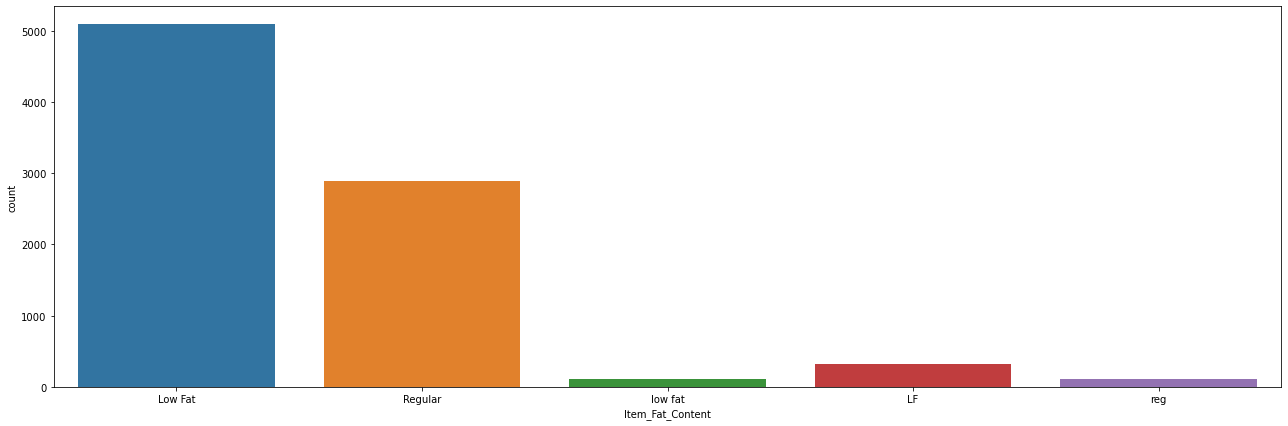

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


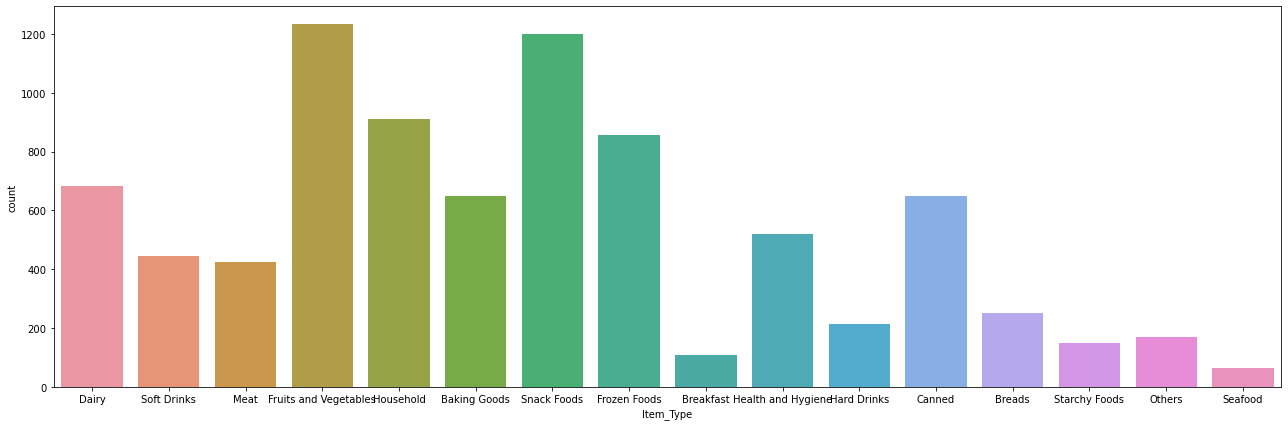

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


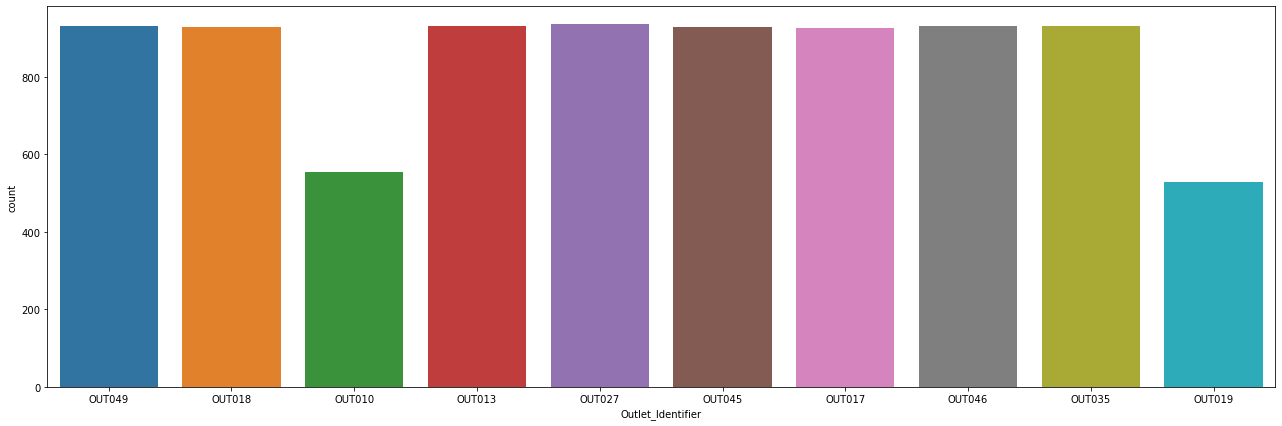

1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


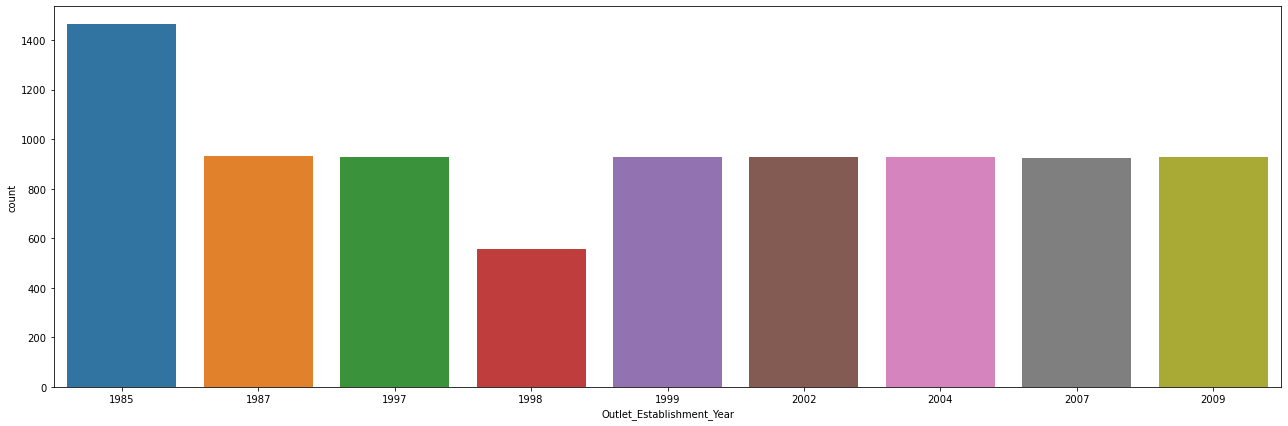

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64


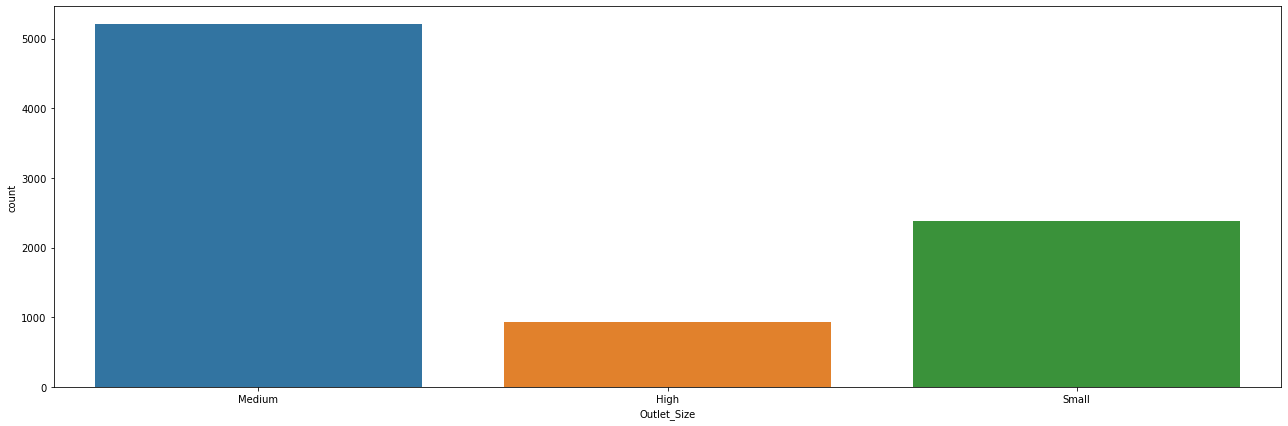

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


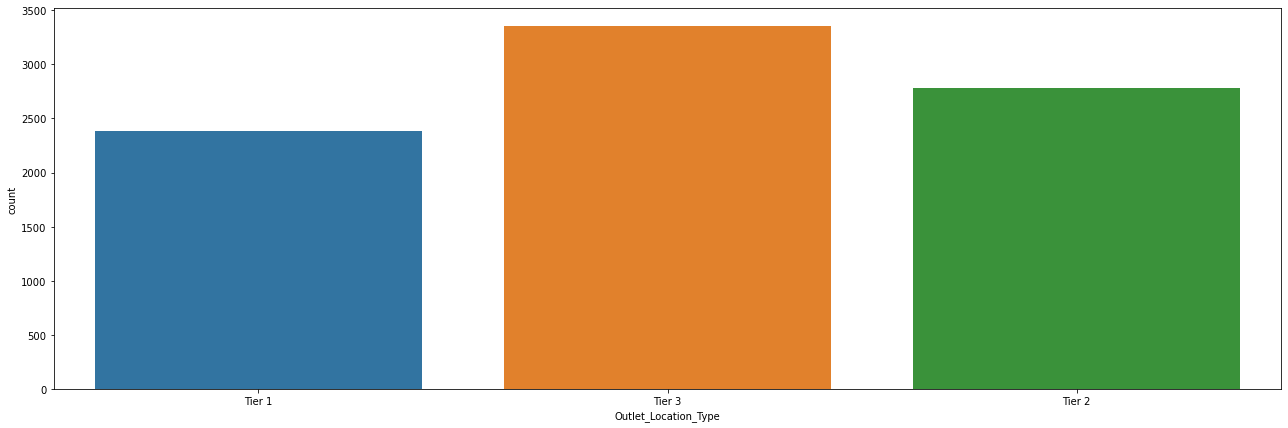

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


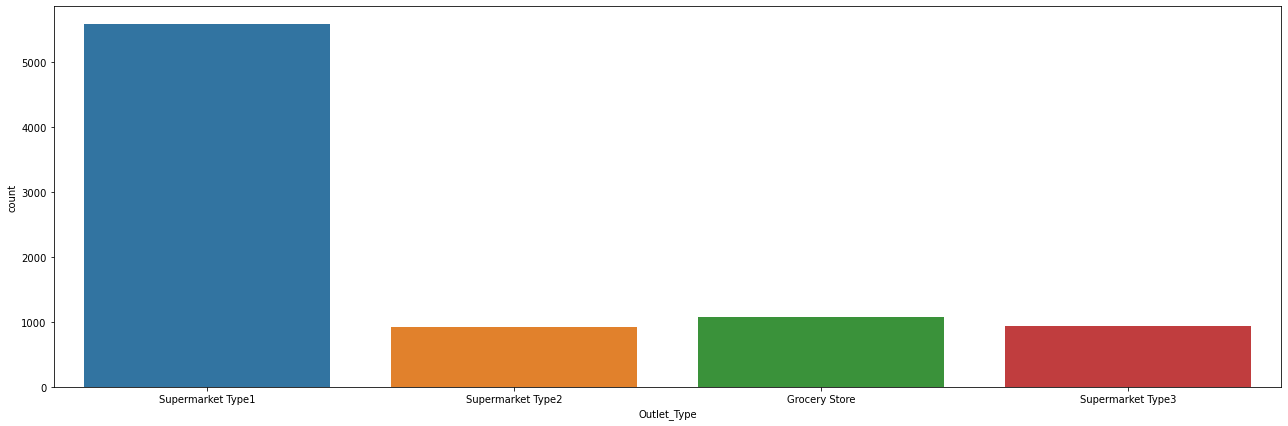

In [46]:
for i in df_categorical:
    plt.figure(figsize = (22,7))
    ax = sb.countplot(x = i, data = df)
    print(df[i].value_counts())
    plt.show()

From the graphs above, the assesments are: 

Item_Fat_Content: Low Fat, LF, and low_fat are the same columns which needs to be remnamed. 

Item_Type: There are high number of Fruits & Vegitables, and Snack foods compared to others. Seafood and Breakfast and the lowest number of entries in the lists. 

Outlet_Identifier: Except for OUT010 & OUT019, all other types have the same number of entries. 

Outlet_Establishment_Year: The highest number of stores established was in 1985 and the lowest number was in 1998. All the other years have seen the same number of new establishments. 

Outlet_Size: There are a lot of Medium sized stores, while the High and Small. This could be because of the Outlet_Size was SimpleImputed and the NaN values filled with most_frequent.

Outlet_Location_Type: There are a lot of Tier 3 stores, while the Tier 1 count are lower in comparison. 

Outlet_Type: There are a lot of Type 1 Supermarket compared to Type 2, Type 3 and Grocery stores. 

In [47]:
#Plotting scatter plots for continuous variables.

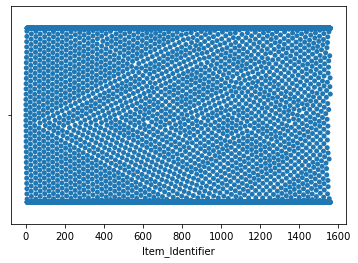

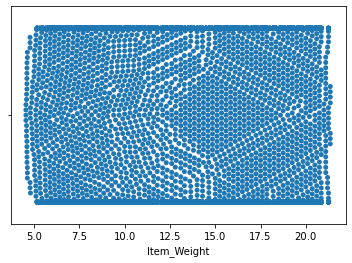

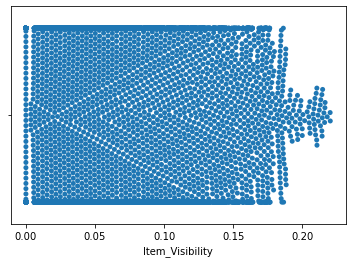

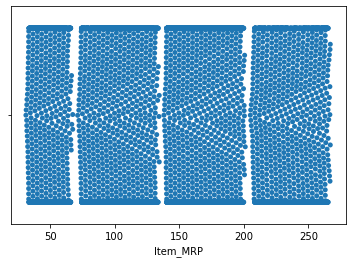

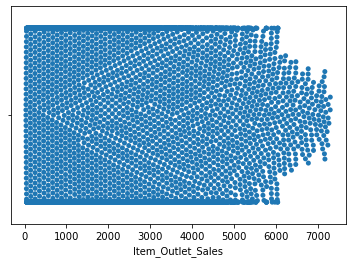

In [129]:
for i in df_continuous:
    sb.swarmplot(x = i, data = df)
    plt.show()

We can see that there are only a small number of outliers in Item_Outlet_Sales and Item_Visibility. So we will have to check the skewness of those columns. 

We can be sure that both the charts above are skewed, and there are outliers. 

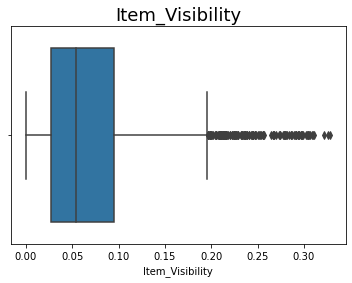

In [82]:
sb.boxplot(df['Item_Visibility'])
plt.title('Item_Visibility', fontsize = 18)
plt.show()

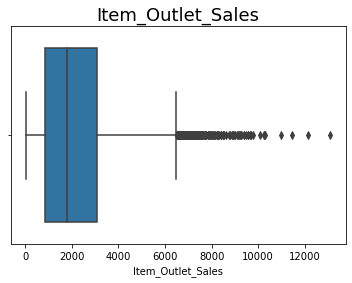

In [81]:
sb.boxplot(df['Item_Outlet_Sales'])
plt.title('Item_Outlet_Sales', fontsize = 18)
plt.show()

### Editing values in Item_Fat_Content

In [56]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [57]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Low Fat','low fat','LF'],'Low Fat')

In [58]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Regular', 'reg'],'Regular')

In [59]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

### Encoding the DataFrame

In [55]:
from sklearn.preprocessing import OrdinalEncoder

In [60]:
col = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
oe = OrdinalEncoder()
for i in col: 
    df[i] = oe.fit_transform(df[i].values.reshape (-1,1))

In [61]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.30,0.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.92,1.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.50,0.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.20,1.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.93,0.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052


### Describe the data

In [62]:
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,0.352693,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.477836,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,0.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


<AxesSubplot:>

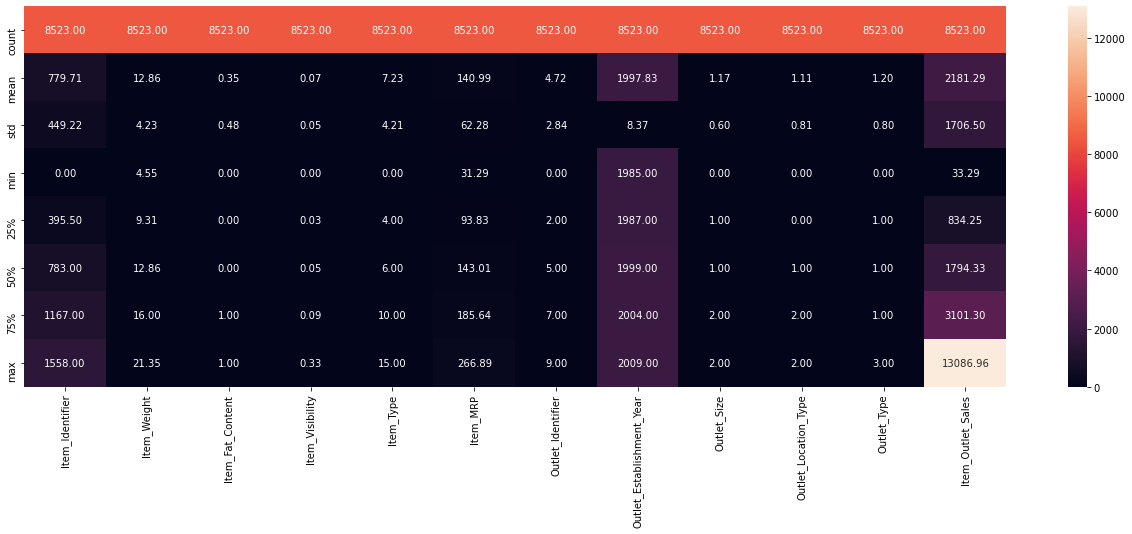

In [63]:
plt.figure(figsize = (22,7))
sb.heatmap(df.describe(), annot = True, fmt = '0.2f')

There are no high variances between the mean and the max values in most columns except for Item_Outlet_Sales. However, this is the Y variable, hence it's not a problem. 

### Finding the Correlation

In [64]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.114660,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.000622,-0.001598,0.002199,0.018719
Item_Visibility,-0.025482,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.007225,-0.000622,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


<AxesSubplot:>

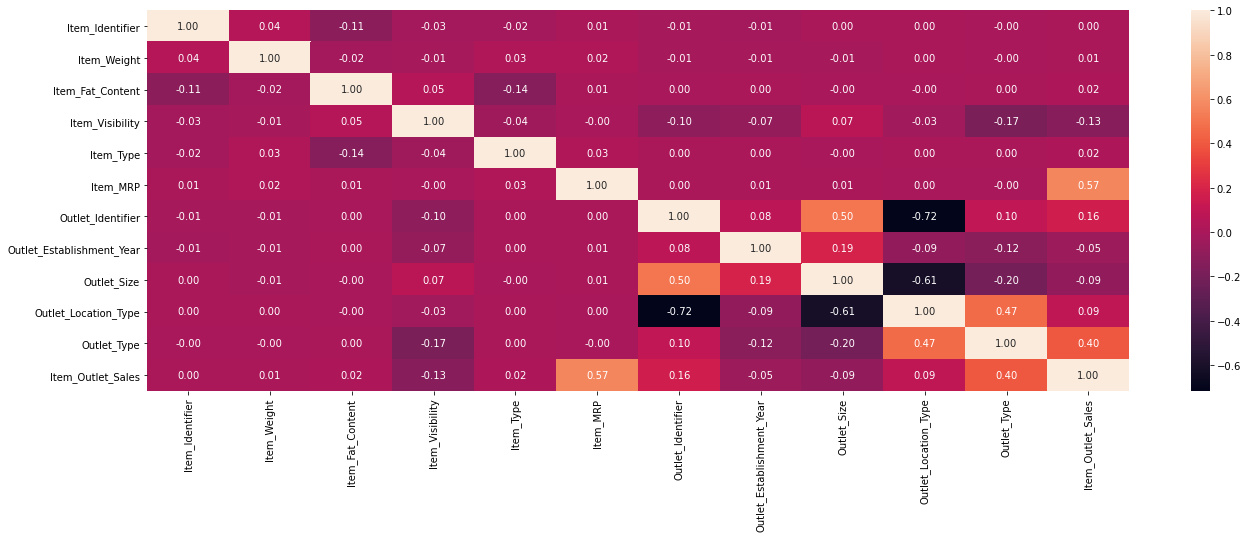

In [65]:
#Visualizing correlation using heatmap
plt.figure(figsize = (22,7))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f')

There is a good correlation between Item_MRP and Item_Outlet_Sales, Outlet_Identifier and Outlet_Size, Outlet_Location_Type and Outlet_Type, & Outlet_Type and Item_Outlet_Sales

There is a high negative correlation between Outlet_Identifier and Outlet_Location_Type, & Outlet_size and Outlet_Location_Type

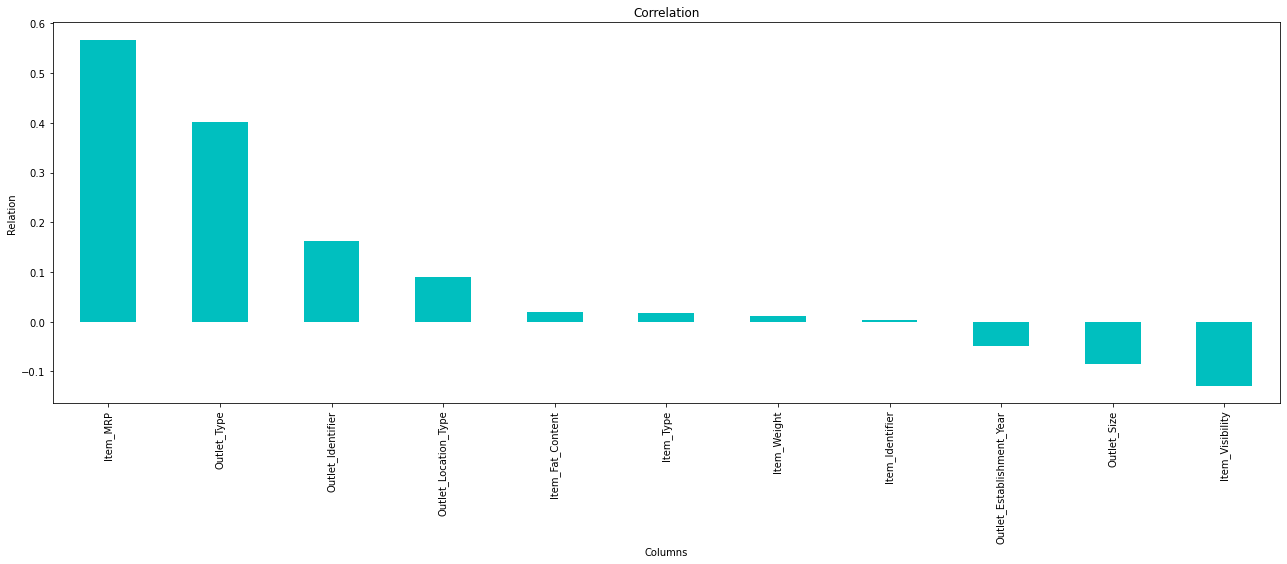

In [66]:
#Plotting the relationship between all the columns to Item_Outlet_Sales
plt.figure(figsize = (22,7))
df.corr()['Item_Outlet_Sales'].sort_values(ascending = False).drop(['Item_Outlet_Sales']).plot(kind = 'bar', color = 'c')
plt.xlabel('Columns')
plt.ylabel('Relation')
plt.title('Correlation')
plt.show()

The graph above shows the relationship each column has with every other columns in the dataset. Item_MRP, Outlet_Type has the highest correlation while Item_Fat_Content, Item_Type, Item_Weight and Item_Identifier has the lowest correlation.

In [74]:
colm = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Type']

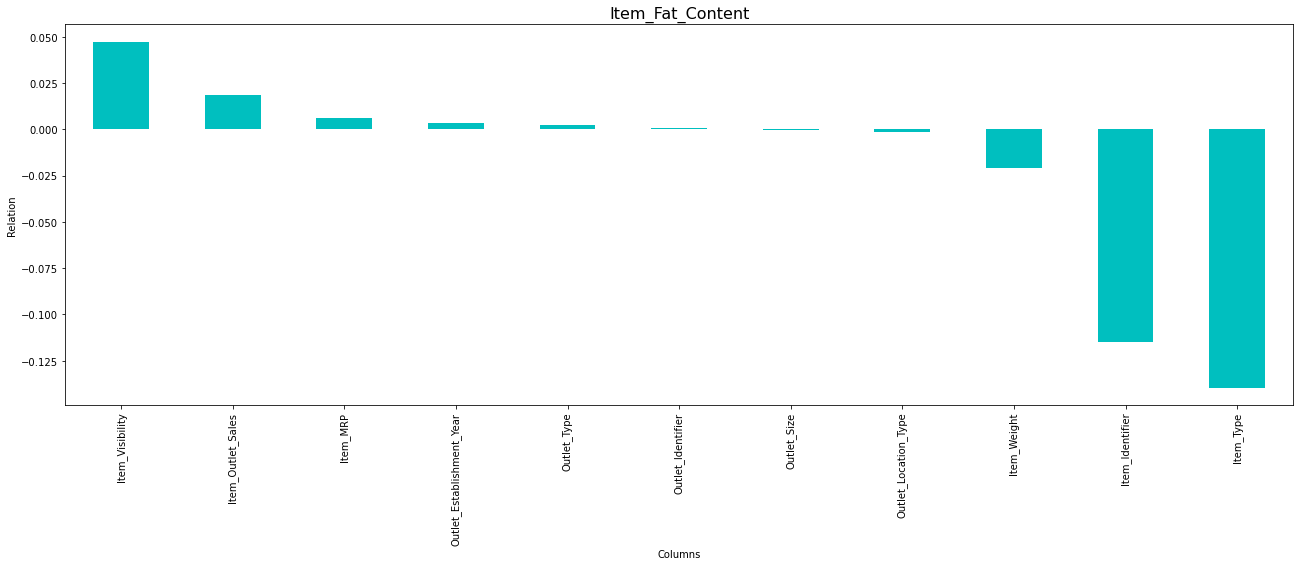

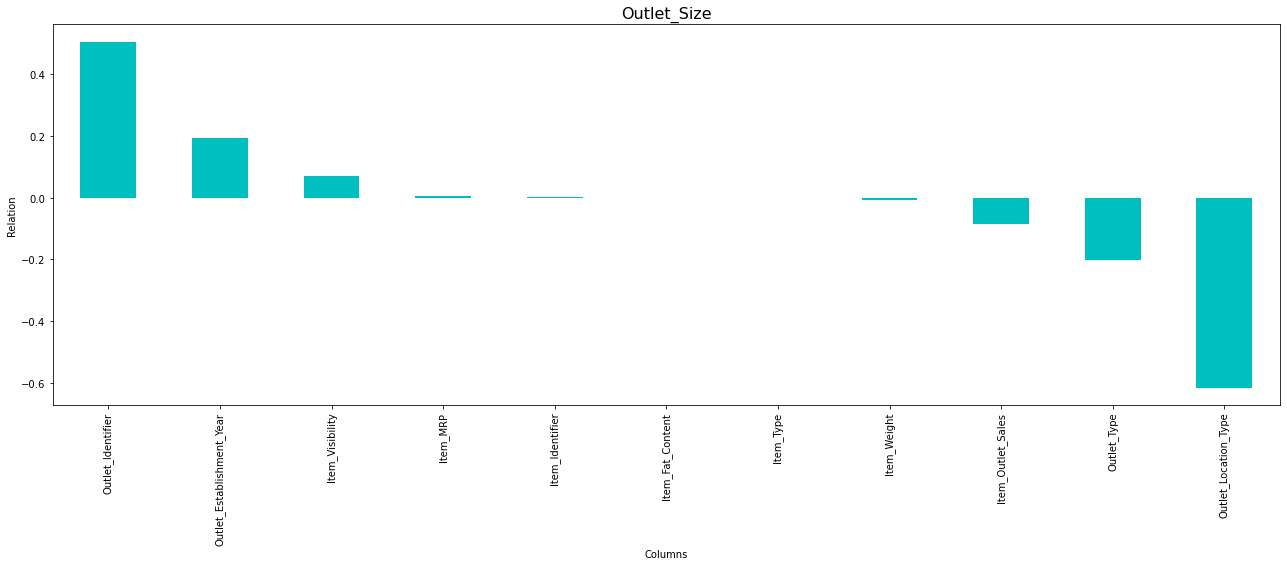

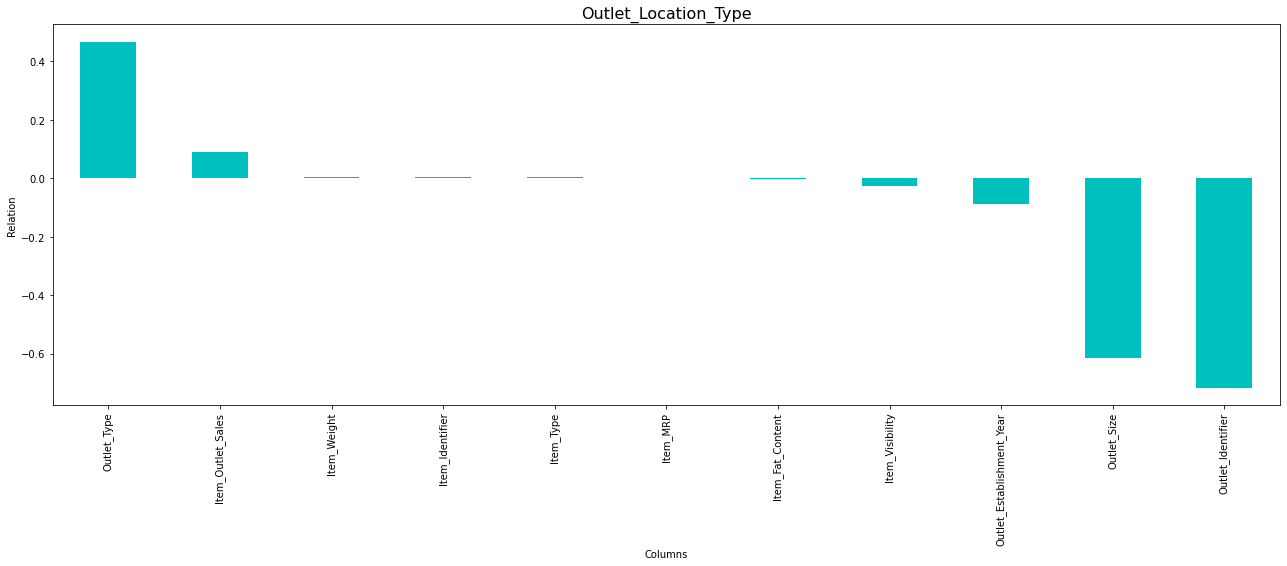

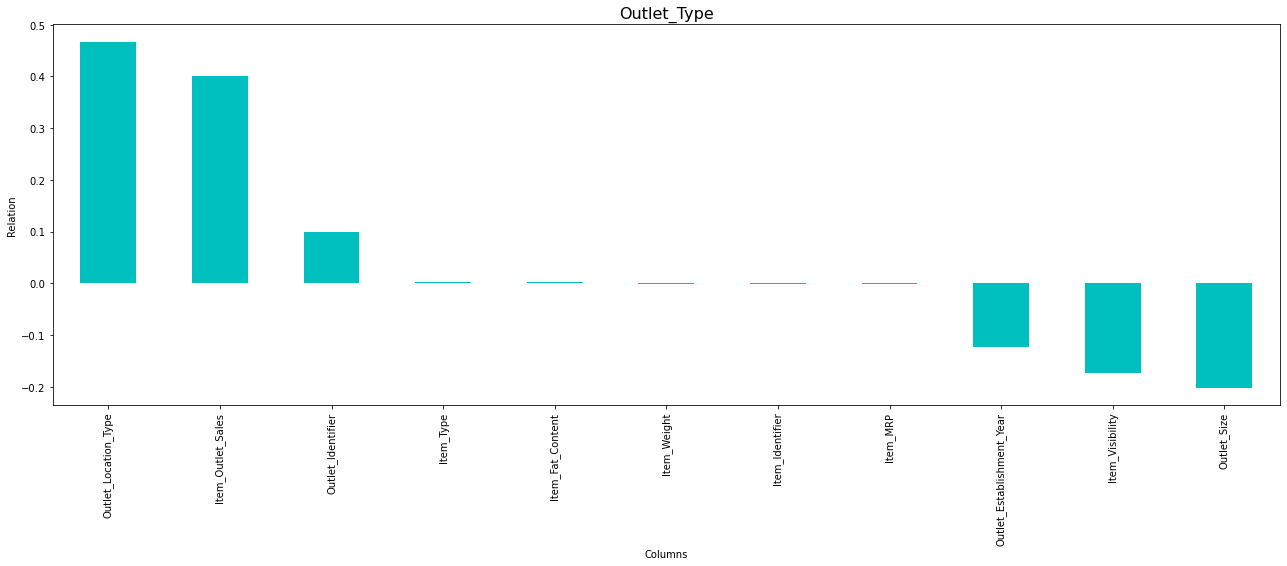

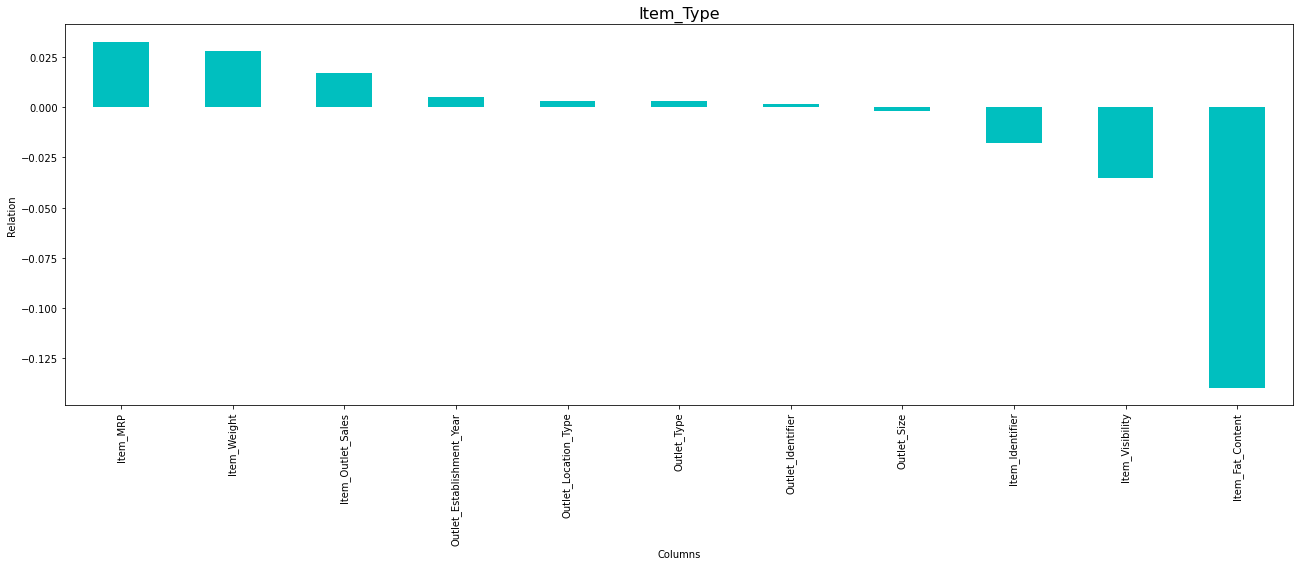

In [75]:
for i in colm: 
    plt.figure(figsize = (22,7))
    df.corr()[i].sort_values(ascending = False).drop([i]).plot(kind = 'bar', color = 'c')
    plt.xlabel('Columns')
    plt.ylabel('Relation')
    plt.title(i, fontsize = 16)
    plt.show()

Item_Fat_Content has the highest correlation with Item_Type and Item_Identifier.

Outlet_Size has the highest correlation with Outlet_Identifier and Outlet_Location_Type.

Outlet_Location_Type has the highest correlation with Outlet_Type, Outlet_size and Outlet_Identifier. 

Outlet_Type has the highest correlation with Outlet_Location_Type and Item_Outlet_Sales

Item_Type has the highest correlation with Item_Fat_Content

### Handling outliers

In [83]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
threshold = 2
np.where(z>3)

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
         456,  472,  502,  521,  532,  661,  694,  753,  809,  854,  935,
         991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324, 1434,
        1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827, 1841,
        1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324, 2439,
        2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017, 3083,
        3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474, 3488,
        3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993, 4006,
        4219, 4289, 4346, 4349, 4382, 4408, 4530, 4656, 4674, 4676, 4681,
        4772, 4789, 4888, 4941, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
        5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5795,
        5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000, 6008, 6012, 6134,
        6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606, 6622, 6674, 6786,
        6886, 6903, 6993, 7005, 7016, 

We can see that there are quite a number of outliers in the dataset especially in 2 columns. Proceeding to remove those. 

In [84]:
df_new = df[(z<3).all(axis = 1)]
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,0.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.920,1.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.500,0.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,1.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.930,0.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,0.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8519,897.0,8.380,1.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8520,1357.0,10.600,0.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8521,681.0,7.210,1.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


In [85]:
df.shape

(8523, 12)

In [86]:
df_new.shape

(8338, 12)

In [87]:
#Percentage of Data loss. 
loss = ((8523-8338)/8523)*100
loss

2.170597207556025

Since there is only a 2% data loss, we can remove the outliers. 

In [89]:
df = df_new

In [97]:
df.shape

(8338, 12)

### Splitting the X and Y variables

In [101]:
x = df.iloc[:, 0:11]
y = df.iloc[:, -1]

In [102]:
x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156.0,9.30,0.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0
1,8.0,5.92,1.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0
2,662.0,17.50,0.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0
3,1121.0,19.20,1.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0
4,1297.0,8.93,0.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0


In [103]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

### Finding the best random state

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [109]:
lr = LinearRegression()

In [110]:
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = i)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    
    print(f'At random state {i}, the training accuracy is: {r2_score(y_train, pred_train)}')
    print(f'At random state {i}, the testing accuracy is: {r2_score(y_test, pred_test)}')
    print('\n')

At random state 0, the training accuracy is: 0.503558661368402
At random state 0, the testing accuracy is: 0.48800161220347915


At random state 1, the training accuracy is: 0.4961053756587671
At random state 1, the testing accuracy is: 0.5062852813073533


At random state 2, the training accuracy is: 0.4995951865626519
At random state 2, the testing accuracy is: 0.4980485010608402


At random state 3, the training accuracy is: 0.5008402701075557
At random state 3, the testing accuracy is: 0.49520800014459687


At random state 4, the training accuracy is: 0.4946052521346147
At random state 4, the testing accuracy is: 0.5090399168001347


At random state 5, the training accuracy is: 0.4981215215489534
At random state 5, the testing accuracy is: 0.4988289507585453


At random state 6, the training accuracy is: 0.5012520916547702
At random state 6, the testing accuracy is: 0.4933945779312394


At random state 7, the training accuracy is: 0.4996810264925169
At random state 7, the testing a

At random state 90, the testing accuracy is: 0.4897021371895124


At random state 91, the training accuracy is: 0.5021110130925229
At random state 91, the testing accuracy is: 0.4917202498967632


At random state 92, the training accuracy is: 0.5067171332340927
At random state 92, the testing accuracy is: 0.4797251170154173


At random state 93, the training accuracy is: 0.5000118295909282
At random state 93, the testing accuracy is: 0.49623273688408465


At random state 94, the training accuracy is: 0.501779467117835
At random state 94, the testing accuracy is: 0.4925082252664429


At random state 95, the training accuracy is: 0.49580592126358713
At random state 95, the testing accuracy is: 0.5047260114004275


At random state 96, the training accuracy is: 0.5106421515634365
At random state 96, the testing accuracy is: 0.47198649769290435


At random state 97, the training accuracy is: 0.4948293901019788
At random state 97, the testing accuracy is: 0.5089336874412353


At random state

We ccan see that the best scores fall under the random_state: 69

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 69)

In [112]:
x_train.shape

(5836, 11)

In [113]:
x_test.shape

(2502, 11)

In [114]:
y_train.shape

(5836,)

In [115]:
y_test.shape

(2502,)

### Running Regressor models

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [117]:
lr = LinearRegression()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
svr = SVR()
rfr = RandomForestRegressor()
ls = Lasso()
rd = Ridge()
eln = ElasticNet()

In [118]:
model = [lr, knr, dtr, svr, rfr, ls, rd, eln]
for m in model:
    print(m)
    m.fit(x_train, y_train)
    a = m.score(x_train, y_train)
    pred = m.predict(x_test)
    print('Score: ', a)
    print('Mean absolute error: ', mean_absolute_error(y_test,pred))
    print('Mean squared error: ', mean_squared_error(y_test,pred))
    print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred)))
    print('R2 Score: ', r2_score(y_test,pred))
    print('\n\n')

LinearRegression()
Score:  0.5025473206298315
Mean absolute error:  855.7309025532436
Mean squared error:  1257107.9316465165
Root mean squared error:  1121.2082463336224
R2 Score:  0.4904783260603687



KNeighborsRegressor()
Score:  0.4532391949701883
Mean absolute error:  1054.9183744044765
Mean squared error:  1944612.6963207296
Root mean squared error:  1394.4937060886039
R2 Score:  0.21182398801998392



DecisionTreeRegressor()
Score:  1.0
Mean absolute error:  1024.4115354916069
Mean squared error:  2085947.9469051517
Root mean squared error:  1444.2811176862874
R2 Score:  0.15453903129384872



SVR()
Score:  -0.041774273023646336
Mean absolute error:  1228.249036224769
Mean squared error:  2532100.07644458
Root mean squared error:  1591.257388496462
R2 Score:  -0.026292044663901004



RandomForestRegressor()
Score:  0.9379334092470272
Mean absolute error:  772.5345629864108
Mean squared error:  1158481.1998146714
Root mean squared error:  1076.3276451966992
R2 Score:  0.53045298

### Cross Validation

In [119]:
from sklearn.model_selection import cross_val_score

Using for loop to find the best cross val score which gives us the best values.

In [120]:
model = [lr, knr, dtr, svr, rfr, ls, rd, eln]
for m in model:
    print(m)
    i = []
    for a in range (2,10):
        score = cross_val_score(m, x, y, cv = a)
        k = score.mean()
        i.append(k)
    print(i)
    print('CV Value = ', i.index(max(i))+2)
    print('Best Score =' , max(i))
    print('\n')

LinearRegression()
[0.49707012823873875, 0.4972915416811108, 0.49609350948245223, 0.4970789373026016, 0.49750922910305984, 0.4976753643430708, 0.49703640471549904, 0.4972587832126129]
CV Value =  7
Best Score = 0.4976753643430708


KNeighborsRegressor()
[0.2058758480881862, 0.20762903444859684, 0.2025343009057103, 0.1964792435661003, 0.1965011548940093, 0.19886877305232678, 0.19495212848023183, 0.1943295300586911]
CV Value =  3
Best Score = 0.20762903444859684


DecisionTreeRegressor()
[0.14014808245083626, 0.14968161461641674, 0.1465329526521846, 0.1315096010810616, 0.13545065205816628, 0.12127811002788398, 0.11847817721158022, 0.15144734901843185]
CV Value =  9
Best Score = 0.15144734901843185


SVR()
[-0.0444537374750994, -0.04372710805054939, -0.043062648829646555, -0.04326886958298219, -0.042617551629020776, -0.042458179679655324, -0.042667448654432755, -0.04256410781644276]
CV Value =  7
Best Score = -0.042458179679655324


RandomForestRegressor()
[0.5348165934962896, 0.537175701

We can see that DecisionTreeRegressor is the best model as it has the lowest difference between the R2_Score and the Cross_Val_Score with an average accuracy of 15.2%.

However, since the accuracy is so low, I'm going with RandomForestRegressor

The best CV number for DecisionTreeRegressor is 7 and for RandomForestRegressor is 6

### Running RandomForestRegressor separately

In [124]:
rfr.fit(x_train, y_train)
a = rfr.score(x_train, y_train)
pred_train = rfr.predict(x_train)
pred_test_rfr = rfr.predict(x_test)

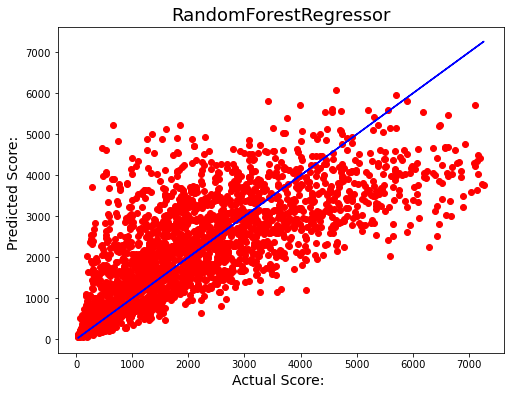

In [126]:
plt.figure(figsize = (8,6))
plt.scatter(x = y_test, y = pred_test_rfr, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual Score: ', fontsize = 14)
plt.ylabel('Predicted Score: ', fontsize = 14)
plt.title('RandomForestRegressor', fontsize = 18)
plt.show()

### Regularization using GridSearchCV

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
parameters = {'criterion':['mse', 'mae'], 'max_features':['auto', 'sqrt', 'log2']}
rfr = RandomForestRegressor()
gscv = GridSearchCV(rfr, parameters)
gscv.fit(x_train, y_train)

print(gscv.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [137]:
rfr_reg = RandomForestRegressor(criterion = 'mae', max_features = 'log2')
rfr_reg = RandomForestRegressor()
rfr_reg.fit(x_train, y_train)
rfr_reg.score(x_train, y_train)
predrfr_reg = rfr_reg.predict(x_test)
data = [predrfr_reg, y_test]
pd.DataFrame(data, index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,...,2492,2493,2494,2495,2496,2497,2498,2499,2500,2501
Predicted,3971.343866,3090.563704,2378.164362,1686.278318,1012.728406,448.502854,2921.337318,203.594982,225.752806,3449.915938,...,3968.787194,1369.903474,78.744166,71.753266,439.674346,253.929462,2209.836806,1652.096146,1610.683386,2435.176816
Actual,4157.255200,2964.141600,3016.739800,1281.665000,639.168000,101.867400,2931.517400,258.330400,263.656800,6897.688000,...,7266.541200,1245.046000,71.906400,129.831000,457.404600,436.764800,2053.327200,468.723200,986.715600,1838.273800


In [138]:
print('Errors:')
print('\n')
print('Mean absolute error: ', mean_absolute_error(y_test,predrfr_reg))
print('Mean squared error: ', mean_squared_error(y_test,predrfr_reg))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,predrfr_reg)))
print('\n')
print('R2 Score: ', r2_score(y_test,predrfr_reg))

Errors:


Mean absolute error:  765.4865457553956
Mean squared error:  1147242.5159631148
Root mean squared error:  1071.0940742825137


R2 Score:  0.5350081624394625


### Saving the model

In [140]:
import joblib
joblib.dump(rfr_reg, 'Big_Mart_Data.obj')

['Big_Mart_Data.obj']

### Re-importing the model

In [142]:
final = joblib.load('Big_Mart_Data.obj')
final.predict(x_train)

array([2534.094722,  199.526944, 4208.841384, ..., 5689.740376,
       3387.770166,  812.022996])

In [143]:
Model_accuracy = pd.DataFrame([final.predict(x_test)[:], predrfr_reg[:]], index = ['Predicted', 'Original'])

In [144]:
Model_accuracy

,0,1,2,3,4,5,6,7,8,9,...,2492,2493,2494,2495,2496,2497,2498,2499,2500,2501
Predicted,3971.343866,3090.563704,2378.164362,1686.278318,1012.728406,448.502854,2921.337318,203.594982,225.752806,3449.915938,...,3968.787194,1369.903474,78.744166,71.753266,439.674346,253.929462,2209.836806,1652.096146,1610.683386,2435.176816
Original,3971.343866,3090.563704,2378.164362,1686.278318,1012.728406,448.502854,2921.337318,203.594982,225.752806,3449.915938,...,3968.787194,1369.903474,78.744166,71.753266,439.674346,253.929462,2209.836806,1652.096146,1610.683386,2435.176816


### Importing the Test Data

In [145]:
tf = pd.read_csv('Big_Mart_Data_Test.csv')
tf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [151]:
tf.shape

(5681, 11)

In [153]:
tf.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [154]:
tf.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [155]:
tf.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Filling the NaN values

In [167]:
tf['Item_Weight'] = tf['Item_Weight'].fillna(np.mean(tf['Item_Weight']))

In [168]:
#Simple Imputer has been called as 'si'
si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
tf['Outlet_Size'] = si.fit_transform(tf['Outlet_Size'].values.reshape(-1, 1))

In [169]:
tf.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Editing values in the Item_Fat_Content column

In [170]:
tf['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [171]:
tf['Item_Fat_Content'] = tf['Item_Fat_Content'].replace(['Low Fat','low fat','LF'],'Low Fat')

In [172]:
tf['Item_Fat_Content'] = tf['Item_Fat_Content'].replace(['Regular', 'reg'],'Regular')

In [173]:
tf['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

### Encoding

In [175]:
#I have created an instance 'oe' for Ordinal Encoder
col = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for i in col: 
    tf[i] = oe.fit_transform(tf[i].values.reshape (-1,1))

In [176]:
tf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103.0,9.30,0.0,0.007565,13.0,107.8622,9.0,1999,1.0,0.0,1.0
1,1067.0,5.92,1.0,0.038428,4.0,87.3198,2.0,2007,1.0,1.0,1.0
2,1406.0,17.50,0.0,0.099575,11.0,241.7538,0.0,1998,1.0,2.0,0.0
3,809.0,19.20,0.0,0.015388,13.0,155.0340,2.0,2007,1.0,1.0,1.0
4,1184.0,8.93,1.0,0.118599,4.0,234.2300,5.0,1985,1.0,2.0,3.0


### Reimporting the model

In [182]:
testing = joblib.load('Big_Mart_Data.obj')
test_prediction = testing.predict(tf)

In [188]:
pd.DataFrame(test_prediction)

,0
0,1544.289810
1,1301.632342
2,790.144808
3,2588.417344
4,5390.629726
...,...
5676,2380.488004
5677,2975.520122
5678,1615.250774
5679,4516.933676
